# Seasonality

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from prophet import Prophet

In [2]:
URL = 'https://raw.githubusercontent.com/PacktPublishing/Forecasting-Time-Series-Data-with-Facebook-Prophet/main/data/AirPassengers.csv'
df = pd.read_csv(URL)
df['Month'] = pd.to_datetime(df['Month'])
df.columns = ['ds', 'y']

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      66       398.401   0.000378364       90.3726   4.457e-06       0.001      123  LS failed, Hessian reset 
      93       398.516   0.000318384       86.6439   5.405e-06       0.001      205  LS failed, Hessian reset 
      99       398.529   4.48541e-05       82.4694      0.4269      0.4269      212   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       398.593   4.45915e-06       66.6257           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       398.596   2.71967e-05       74.2958   3.017e-07       0.001      413  LS failed, Hessian reset 
     270       398.597   3.55624e-09       56.3026      0.1641      0.1641      490   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

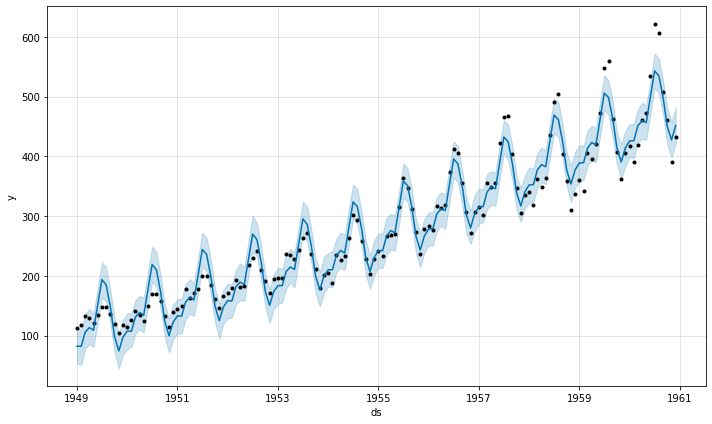

In [3]:
model_a = Prophet(seasonality_mode='additive', yearly_seasonality=4)
model_a.fit(df)
forecast_a = model_a.predict()
fig_a = model_a.plot(forecast_a)
plt.show()

> By default, if no `seasonality_mode` is stated, then Prophet will automatically select `'additive'`.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      83       485.276   0.000333743       168.376   3.876e-06       0.001      158  LS failed, Hessian reset 
      99       485.325   7.70573e-05       53.0977       8.049      0.8049      181   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     180       485.816   1.25966e-05       56.8143     1.7e-07       0.001      326  LS failed, Hessian reset 
     199       485.817   7.28494e-08       53.1172      0.1446      0.6424      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       485.817   2.27369e-07       53.8338   3.088e-09       0.001      412  LS failed, Hessian reset 
     213       485.817   1.17942e-08       44.2282     0.03507           1      417   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

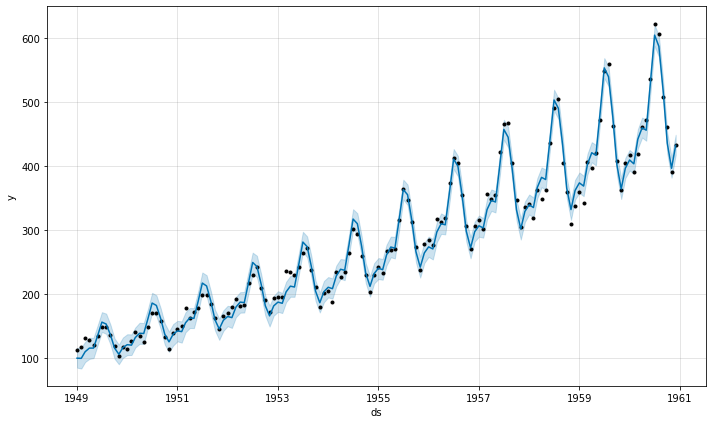

In [4]:
model_m = Prophet(seasonality_mode='multiplicative', yearly_seasonality=4)
model_m.fit(df)
forecast_m = model_m.predict()
fig_m = model_m.plot(forecast_m)
plt.show()

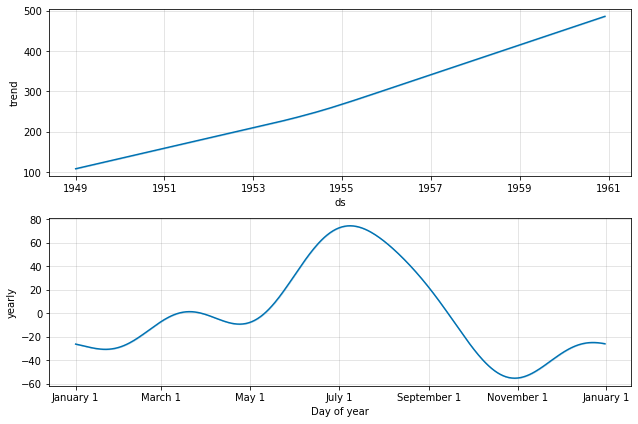

In [6]:
fig_a2 = model_a.plot_components(forecast_a)
plt.show()

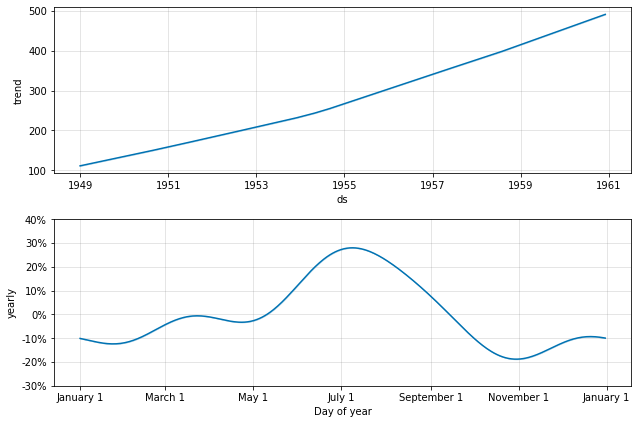

In [7]:
fig_m2 = model_m.plot_components(forecast_m)
plt.show()

In [8]:
URL = 'https://raw.githubusercontent.com/PacktPublishing/Forecasting-Time-Series-Data-with-Facebook-Prophet/main/data/divvy_daily.csv'
df = pd.read_csv(URL)
df.head()

,date,rides,temperature,weather
0,1/1/2014,95,19.483158,rain or snow
1,1/2/2014,111,16.833333,rain or snow
2,1/3/2014,6,-5.633333,clear
3,1/4/2014,181,30.007735,rain or snow
4,1/5/2014,32,16.756250,rain or snow


In [9]:
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -151.729
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2756.55   0.000861337       101.869      0.4001           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       2757.97    0.00023829       81.1851    1.73e-06       0.001      208  LS failed, Hessian reset 
     199        2758.5   5.28644e-05       80.6646           1           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     290       2758.53   2.92635e-07       58.2167      0.7184      0.7184      419   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


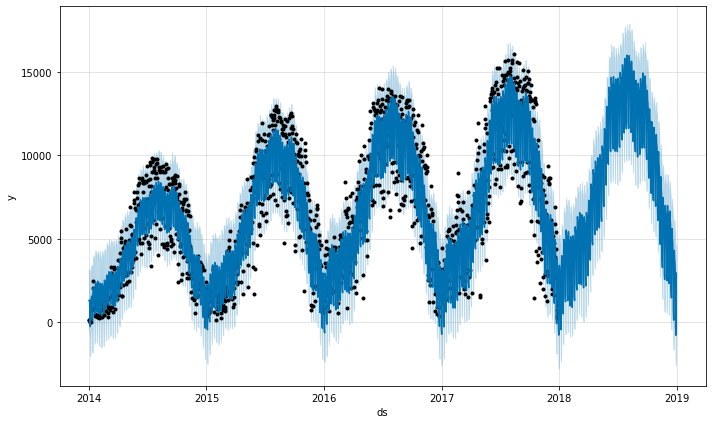

In [10]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

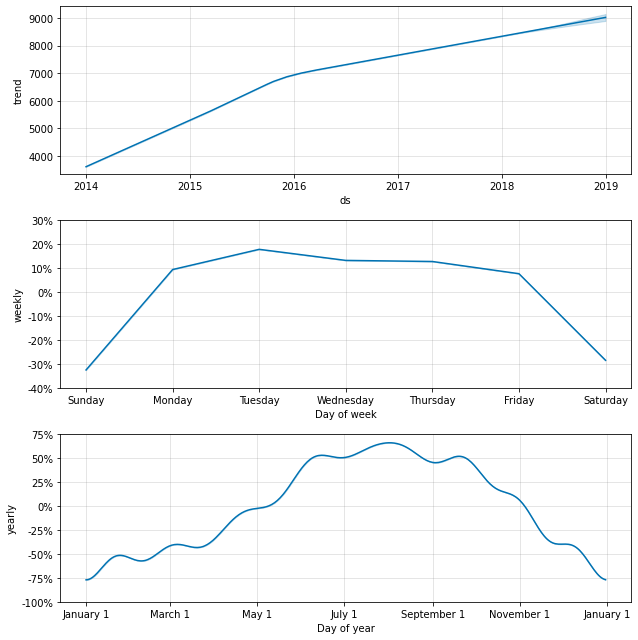

In [11]:
fig2 = model.plot_components(forecast)
plt.show()